# **Classificação de Estrelas, Galáxias e Quasares. Sloan Digital Sky Survey DR17**
---

Catherine Louise Ribeiro – 11930735

Giovanna Garrefa Silveira - 13835983

Ronaldo Aparecido Segundo Junior - 1071099

---
<p align="justify"> O presente notebook é utilizado para a disciplina SME0829 - Aprendizado de Máquinas (1º SEM/2024). Aqui será visto conteúdos lecionados em sala de aula, tais como: aprendizado supervisiodo e não-supervisionado, cross validation, modelos paramétricos (MQO, Lasso e Ridge), métricas de avaliação de modelos, entre outros.



# **Descrição**
O dataset trabalhado está disponível em: [Stellar Classification Dataset - SDSS17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)

<p align="justify"> Objetivo: na astronomia, a classificação estelar é a classificação das estrelas com base nas suas características espectrais. Este dataset visa classificar estrelas, galáxias e quasares com base em suas características espectrais. É composto por 100.000 observações do espaço, retiradas do Sloan Digital Sky Survey (SDSS) DR17. Cada observação se encaixa em uma classe (Estrela, Galáxia ou Quasar).

Cada observação é descrita por 17 características (colunas) e 1 coluna de classe que a identifica como uma estrela, galáxia ou quasar.

As características são:
- obj_ID = Object Identifier, valor único que identifica o objeto no catálogo de imagens utilizado pelo CAS
- alfa = ângulo de ascensão reta (na época J2000)
- delta = Ângulo de declinação (na época J2000)
- u = Filtro ultravioleta no sistema fotométrico
- g = Filtro verde no sistema fotométrico
- r = Filtro vermelho no sistema fotométrico
- i = Filtro infravermelho próximo no sistema fotométrico
- z = Filtro infravermelho no sistema fotométrico
- run_ID = Número de execução usado para identificar a verificação específica
- rereun_ID = Número de nova execução para especificar como a imagem foi processada
- cam_col = Coluna da câmera para identificar a linha de varredura na execução
- field_ID = Número do campo para identificar cada campo
- spec_obj_ID = ID exclusivo usado para objetos espectroscópicos ópticos (isso significa que 2 observações diferentes com o mesmo spec_obj_ID devem compartilhar a classe de saída)
- class = classe do objeto (objeto galáxia, estrela ou quasar)
- redshift = valor do redshift com base no aumento do comprimento de onda
- placa = ID da placa, identifica cada placa no SDSS
- MJD = Data Juliana Modificada, usada para indicar quando um determinado dado do SDSS foi obtido
- Fiber_ID = ID da fibra que identifica a fibra que apontou a luz para o plano focal em cada observação


# **Bibliotecas**

In [ ]:
# Bibliotecas utilizadas
import time
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn import model_selection as ms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso, Ridge, LassoCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

# **Leitura do dataset**

In [ ]:
# Lê os dados do arquvio csv.
data = pd.read_csv('star_classification.csv')

#**Análise exploratória dos Dados**

In [ ]:
display(data)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
# Verifica as informações do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Perceba que os valores estão dispersos entre si (há colunas com ordens de grandeza diferentes, valores mínimos, máximos e desvios padrão discrepantes).

Alguns algoritmos de aprendizado de máquina, como aqueles baseados em distância, são sensíveis à escala dos dados. Normalizar os dados pode melhorar a eficiência e a precisão desses algoritmos.

In [ ]:
# Verifica o número de valores únicos em cada coluna
data.nunique()

obj_ID         5507
alpha          6260
delta          6260
u              6230
g              6219
r              6227
i              6229
z              6227
run_ID          186
rerun_ID          1
cam_col           6
field_ID        636
spec_obj_ID    6260
class             3
redshift       6236
plate          2400
MJD            1404
fiber_ID        988
dtype: int64

In [ ]:
# Verifica se há valores faltantes e os remove caso tenha
data.isnull().sum()
data = data.dropna()

## **Correlação**

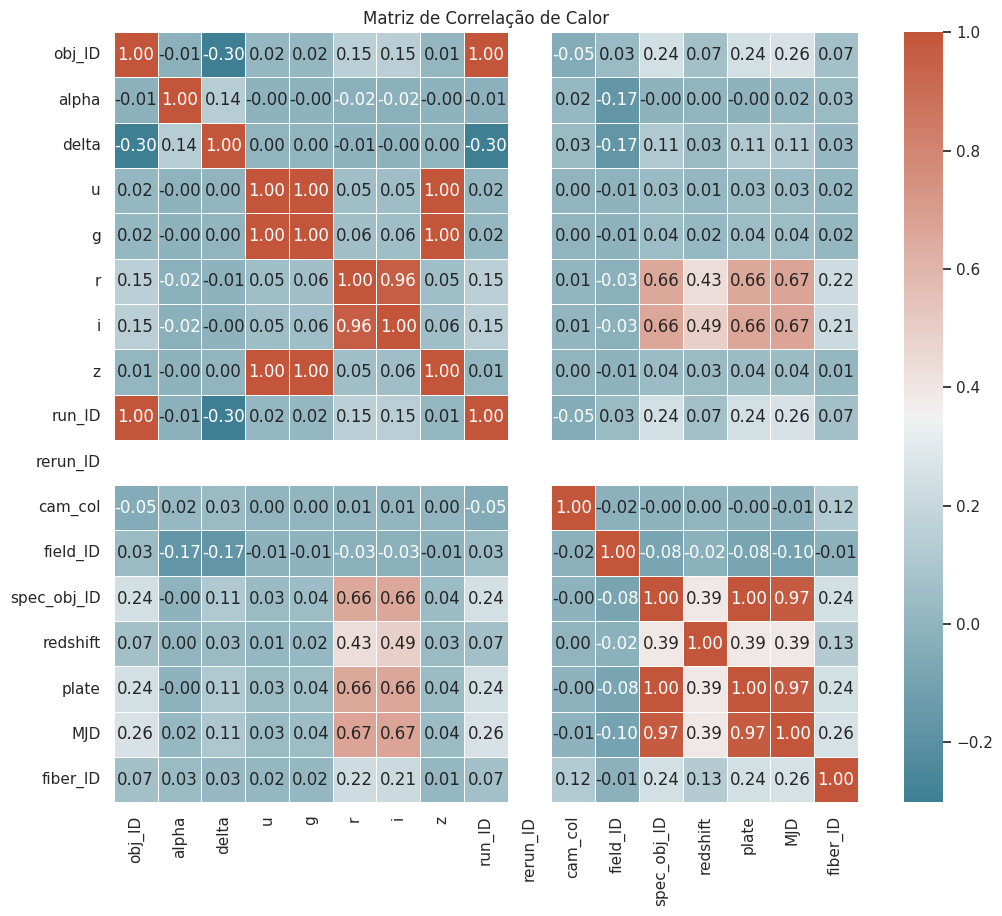

In [ ]:
# Calcula a matriz de correlação ()
correlation_matrix = data.drop(['class'], axis=1).corr()

# Configura o estilo/paleta de cores
sns.set(style='white')
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plota a matriz de correlação de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação de Calor')
plt.show()

Nota-se que alguns atributos possuem uma alta correlação entre si. Alguns são colunas de identificação, como run_id ou spec_obj_ID (o que não faz sentido ser considerado, dado suas definições).

Outros atributos que apresentam grande correlação são advindos das observações (filtros u, g, r, i, z, etc).

# **Métodos paramétricos**

<p align="justify"> Os métodos paramétricos assumem que a função de regressao g(x) pode ser parametrizada com um número finito de parâmetros. Os métodos escolhidos para se trabalhar foram: o método MQ, Lasso e regressão Ridge.

<p align="justify"> Nota: A nossa base de dados em questão (stellar.csv) possui variável de interesse categórica, especificamente com três tipos classes. Entretanto, como precisa-se trabalhar com métodos paramétricos, os quais são ideais para se trabalhar com varíavel dependente contínua, será escolhido, para fins acadêmicos, uma covariável contínua que possua maior correlação com as demais para ser nossa variável de interesse (no caso, z).

```
most_correlated_variable = correlation_matrix.idxmax().sort_values(ascending=False)[0]
print("A covariável mais correlacionada com as demais é:", most_correlated_variable)

# A covariável mais correlacionada com as demais é: z
```




In [ ]:
# Remove a coluna categórica 'class' do dataset
data = data.drop(['class'], axis = 1)

In [ ]:
# Normaliza o dataset
scaler = StandardScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Variáveis independentes (9 ao todo, pois as colunas de IDENTIFICAÇÃO foram ignoradas dadas suas semânticas)
x = data_norm.drop(columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'fiber_ID', 'z'])
# Variável dependente
y = data_norm['z']

# Divide o dataset em linhas de treino e teste para os modelos
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size = 0.3, random_state = 0)

## **Mínimos Quadrados**

<p align="justify"> O que é: O método dos mínimos quadrados ordinários é um tipo de método que escolhe os parâmetros desconhecidos em um modelo de regressão linear (com efeitos fixos de nível um de uma função linear de um conjunto de variáveis ​​explicativas) pelo princípio dos mínimos quadrados, isto é, minimizando a soma dos quadrados das diferenças entre a variável dependente observada (valores da variável observada) no conjunto de dados de entrada e a saída da função (linear) da variável independente.

In [ ]:
# Inicia a contagem de tempo
start_time = time.time()

# O padrão dessa função considera a inclusão de um intercepto
modelo_MQ = sm.OLS(y_train, sm.add_constant(x_train)).fit()
x_test_MQ = sm.add_constant(x_test)

# Faz previsões usando o modelo nos dados de teste
y_pred_MQ = modelo_MQ.predict(x_test_MQ)

# Calcula o tempo de estimação
tempo_MQ = time.time() - start_time

# Adquire os coeficientes + intercepto estimados pelo modelo MQ
coef_MQ = modelo_MQ.params.values
int_MQ = modelo_MQ.params['const']

# Visualzia os resultados
print(modelo_MQ.summary())

# Calcula o erro quadrático médio do modelo MQ
mse_MQ = mean_squared_error(y_test, y_pred_MQ)

# Calcula o erro padrão dos coeficientes
std_err_MQ = np.std(coef_MQ, axis=0)

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.333e+04
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        23:36:38   Log-Likelihood:                 550.13
No. Observations:               17524   AIC:                            -1080.
Df Residuals:                   17514   BIC:                            -1003.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.002      0.419      0.6

## **Lasso**

<p align="justify"> O que é: técnica de regressão linear que adiciona uma penalidade à função de perda durante o treinamento do modelo, que é proporcional à soma dos valores absolutos dos coeficientes. Esta penalidade força alguns coeficientes a serem exatamente zero, o que efetivamente elimina as variáveis menos importantes do modelo. A força da penalidade é controlada por um parâmetro chamado de "alfa" (α).

<p align="justify"> Para encontrar o valor ideal de alfa, usa-se o modelo linear scikit learns lasso com ajuste iterativo ao longo de um caminho de regularização (LassoCV). O melhor modelo é selecionado por validação cruzada.

In [ ]:
# Inicia a contagem de tempo
start_time = time.time()

# Lasso com 5 folds (lotes) para cross-validation
modelo_L = LassoCV(cv=5, random_state=0, max_iter=10000)
modelo_L.fit(x_train, y_train)

# Escolhe o melhor alfa
lasso_best = Lasso(alpha=modelo_L.alpha_)
lasso_best.fit(x_train, y_train)

# Faz previsões no conjunto de teste
y_pred_L= lasso_best.predict(x_test)

# Calcula o tempo de estimação
tempo_Lasso = time.time() - start_time

# Define o número de reamostragens
n_bootstraps = 100

# Inicializa um array para armazenar os coeficientes amostrados
coef_L = np.zeros((n_bootstraps, len(lasso_best.coef_)))

# Realiza bootstrap para estimar os erros padrão dos coeficientes
for i in range(n_bootstraps):
    # Amostra com substituição dos dados de treinamento
    x_boot, y_boot = resample(x_train, y_train)
    # Ajusta o modelo Lasso aos dados de bootstrap
    lasso_best.fit(x_boot, y_boot)
    # Armazena os coeficientes estimados
    coef_L[i] = lasso_best.coef_

# Adquire o intercepto do Lasso
int_L = modelo_L.intercept_

# Calcula o erro quadrático médio do modelo Lasso
mse_L = mean_squared_error(y_test, y_pred_L)

# Calcula o erro padrão dos coeficientes
#std_err_L = np.std(coef_L, axis=0)
std_err_L = np.std(lasso_best.coef_, axis=0)

## **Regressão Ridge**
<p align="justify"> O que é: É uma técnica que adiciona uma penalidade aos coeficientes do modelo, fazendo com que eles não cresçam muito, mesmo que os dados tenham muitas variáveis. Isso ajuda a evitar o overfitting e faz com que os coeficientes fiquem pequenos.

In [ ]:
# Inicia a contagem de tempo
start_time = time.time()

# Criar e treina o modelo de Regressão Ridge
ridge = Ridge(alpha=1.0)  # Você pode ajustar o valor de alpha conforme necessário
ridge.fit(x_train, y_train)

# Faz previsões no conjunto de teste
y_pred_R = ridge.predict(x_test)

# Calcula o tempo de estimação
tempo_R = time.time() - start_time

# Adquire os coeficientes + intercepto estimados pelo modelo Ridge
coef_R = ridge.coef_
int_R = ridge.intercept_

# Calcula o erro quadrático médio do modelo Ridge
mse_R = mean_squared_error(y_test, y_pred_R)

# Calcula o erro padrão dos coeficientes
std_err_R = np.std(coef_R, axis=0)

## **Comparação entre modelos**

In [ ]:
index= ['intercepto', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'redshift', 'plate', 'MJD']
dados = {
    'Mínmos Quadrados': coef_MQ,
    'Ridge': np.insert(coef_R, 0, int_R),
    'Lasso': np.insert(lasso_best.coef_, 0, int_L)
  }

# Criando o DataFrame e o imprime
df = pd.DataFrame(dados, index=index)
df

,Mínmos Quadrados,Ridge,Lasso
intercepto,0.000742,0.000742,0.000685
alpha,-0.000859,-0.000859,-0.002152
delta,-0.003370,-0.003384,-0.005536
u,0.017569,0.017427,0.011900
g,-0.235025,-0.235071,-0.199853
r,0.117946,0.119055,0.081034
i,1.026798,1.025748,1.035313
redshift,0.008647,0.008708,0.008666
plate,-0.023259,-0.023205,-0.000000
MJD,0.038491,0.038462,0.016479


In [ ]:
# Cria e o imprime um DataFrame com os resultados comparativos
resultados = pd.DataFrame({
    'Métricas': ['Tempo de estimação', 'Erro quadrático médio', 'Erro padrão'],
    'Mínmos Quadrados': [tempo_MQ, mse_MQ, std_err_MQ],
    'Lasso': [tempo_Lasso, mse_L, std_err_L],
    'Ridge': [tempo_R, mse_R, std_err_R]
  })

resultados

,Métricas,Mínmos Quadrados,Lasso,Ridge
0,Tempo de estimação,0.063025,0.683404,0.026546
1,Erro quadrático médio,0.048093,0.048130,0.048093
2,Erro padrão,0.321881,0.336568,0.337372


# **Métodos não-paramétricos**

<p align="justify"> Para amostras pequenas, métodos paramétricos costumam
levar a bons resultados: impondo-se um modelo com poucos
parâmetros, é possível criar estimadores com baixa variância
para situações com tamanho amostral n pequeno.
Contudo, quando n é grande, muitas vezes é benéfico
aumentar o número de parâmetros do modelo, de modo que
tenhamos um viés consideravelmente menor às custas de uma
variância um pouco maior. É aí que entra os modelos não-paramétricos, que têm infinitos
parâmetros.

<p align="justify"> Entretanto, com os modelos não-paramétricos a seguir (KNN, Rede Neural e Random Forest) é possível se trabalhar com nossa variável resposta original e categórica: a variável *class*

In [ ]:
# Como a variável class foi retirada anteriormente, precisa-se embutí-la novamente.
data = pd.read_csv('star_classification.csv')
data.isnull().sum()
data = data.dropna()

# Separa os dados em features (x) e target (y). As colunas de ID também serão desconsideradas aqui dadas suas semânticas.
x = data.drop(columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'fiber_ID', 'class'])
y = data['class']

# Divide os dados em conjunto de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Normaliza os dados
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## **K-Nearest Neighbours**
**O que é**: <p align="justify">

* Possui os hiperparâmetros:
>- k_neighbors: número de vizinhos.
>- weights: peso das instâncias na classificação, podendo ser *uniform*, onde todos vizinhos têm o mesmo peso, ou *distance*, vizinhos mais próximos têm mais peso.
>- distância utilizada (euclidiana, manhattan ou outras).

* A normalização dos dados é essencial para o modelo KNN.

* <p align="justify"> Um valor alto de k leva a um modelo muito simples (uma
constante quando k → ∞). Por outro lado, um valor baixo para k leva a um estimador com variância alta, mas viés baixo (daí é interessante utilizar a validação cruzada para se escolher k).


* <p align="justify"> Será utilizada a validação cruzada em busca de grade (grid search) para buscar os melhores conjuntos de hiperparâmetros para um modelo através da avaliação do desempenho do modelo usando validação cruzada em diferentes combinações de hiperparâmetros. Isso ajuda a encontrar os melhores hiperparâmetros de forma mais robusta, levando em consideração a variação nos dados de treinamento.

In [ ]:
# Define os diferentes hiperparâmetros que serão testados
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Cria o modelo KNN
knn = KNeighborsClassifier()

# Cria o objeto GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
# Treina o modelo usando o GridSearch, o qual avalia o modelo para cada combinação possível de hiperparâmetros utilizando validação cruzada.
grid_search.fit(x_train_scaled, y_train)

# Exibi os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Avalia o desempenho do modelo usando os melhores hiperparâmetros
best_knn = grid_search.best_estimator_
accuracy_knn = best_knn.score(x_test_scaled, y_test)
print("Acurácia do modelo com melhores hiperparâmetros:", accuracy_knn)

Melhores hiperparâmetros: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Acurácia do modelo com melhores hiperparâmetros: 0.9470666666666666


In [ ]:
# Treina o modelo com os melhores hiperparâmetross
best_params = grid_search.best_params_
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                metric=best_params['metric'])

# Treinar o modelo com os dados de treinamento
best_knn.fit(x_train_scaled, y_train)

# Fazer previsões com os dados de teste
y_pred = best_knn.predict(x_test_scaled)

# Calcular a acurácia do modelo
accuracy_knn = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN:", accuracy_knn)

Acurácia do modelo KNN: 0.9470666666666666


## **Random Forest**

## **Redes Neurais**
**O que é**:<p align="justify">



## **Comparação entre os modelos**

# **Referências Bibliográficas**
* SDSS17, Stellar Classification Dataset. **Kaggle**. Disponível em: < https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?datasetId=1866141&sortBy=voteCount >. Acesso em 12 de março de 2024.

* Provando o Mínimo Quadrado na Regressão Linear. **Khan Academy Brasil**. Disponível em: <https://www.youtube.com/watch?v=b8qCqDP7I1I>. Acesso em 25 de março de 2024.

* Ordinary Least Squares (OLS) using statsmodels. **Geeks for geeks**. Disponível em: <https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/>. Acesso em 02 de maio de 2024.

* Classificação e regressão com K-nearest neighbors. **GlobalMin**. Disponível em: <https://juliocprocha.wordpress.com/2017/07/14/classificacao-e-regrecao-com-k-nearest-neighbors/>. Acesso em 05 de maio de 2024.